In [71]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as anim
from tqdm import tqdm

$$
Coeficiente\ de\ friccion.
$$

In [72]:
def cdfunc(vx,vy,vz,w,r,vc,vs):
    v=math.sqrt(vx**2+vy**2+vz**2);
    S=w*r/v;
    if S>0.05 and v>vc:
        cd=0.4127*S**0.3056;
    else:
        cd=0.155+0.346/(1+math.exp((v-vc)/vs))
    return cd

$$
Contantes\ y\ parametros\ de\ las\ ecuaciones\ adimencionales.
$$

In [86]:
#g&densidad
g=9.81
rho=1.2
#pelota
r=0.11
A=np.pi*r**2
m=0.430      
#coeficientes
cd=0.15         
cl=1.7/np.pi
#For the CD-model
vc=12.19
vs=1.309
#Condiciones inciales
x0=0
y0=2
z0=0

wx=0
wy=0
wz=0

w=np.sqrt(wx**2+wy**2+wz**2)#velocidad angular total

v0=40                
theta0=45               
vz0=0                  
vtot0=np.sqrt(v0**2+vz0**2)
vx0=v0*np.cos(theta0*np.pi/180) 
vy0=v0*np.sin(theta0*np.pi/180)
#parametros adimencionales
Ap=v0**2/(r*g)               #parametro rango
B=m*g/(0.5*cd*A*rho*v0**2)   #parametro balistico
S=w*r/vtot0                  #parametro spin  

In [87]:
#parametros temporales
t=np.linspace(0,15,1000000)
T=len(t)
h=(t[T-1]-t[0])/T
print(h)

1.5e-05


In [88]:
#vectores de velocidadaes y posiciones
vx=np.zeros(T)
vy=np.zeros(T)
vz=np.zeros(T)
x=np.zeros(T)
y=np.zeros(T)
z=np.zeros(T)
#parametros iniciales
vx[0]=vx0
vy[0]=vy0
vz[0]=vz0
x[0]=x0
y[0]=y0
z[0]=z0


In [89]:
print(y)

[2. 0. 0. ... 0. 0. 0.]


$$
Funciones\ diferenciales.
$$

In [90]:
def dvx(vx,vy,vz,v,wx,wy,wz,vc,vs,r,m,cl):
    return (-1/(2*m)*cd*A*rho*v**2*vx/v)+(cl/m*np.pi*r**3*rho*(wy*vz-wz*vy))

def dvy(vx,vy,vz,v,wx,wy,wz,vc,vs,r,m,cl):
    return (-1/(2*m)*cd*A*rho*v**2*vy/v)-(g)+(cl/m*np.pi*r**3*rho*(wz*vx-wx*vz))

def dvz(vx,vy,vz,v,wx,wy,wz,vc,vs,r,m,cl):
    return (-1/(2*m)*cd*A*rho*v**2*vz/v)+(cl/m*np.pi*r**3*rho*(wx*vy-wy*vx))

In [91]:
def dx(vx):
    return vx

def dy(vy):
    return vy

def dz(vz):
    return vz

$$
RK4
$$

In [92]:
def Integracion(fx,fy,fz,ux,uy,uz):
    for i in tqdm(range(1,T)):
        #valores para cada iteracion
        vxi=vx[i-1]
        vyi=vy[i-1]
        vzi=vz[i-1]
        vi=np.sqrt(vxi**2+vyi**2+vzi**2)
        
        #parte 1
        k1vx=fx(vxi,vyi,vzi,vi,wx,wy,wz,vc,vs,r,m,cl)
        k1x=ux(vxi)
        k1vy=fy(vxi,vyi,vzi,vi,wx,wy,wz,vc,vs,r,m,cl)
        k1y=uy(vyi)
        k1vz=fz(vxi,vyi,vzi,vi,wx,wy,wz,vc,vs,r,m,cl)
        k1z=uz(vzi)
        
        #parte 2
        k2vx=fx(vxi+h*k1vx/2,vyi+h*k1vy/2,vzi+h*k1vz/2,vi,wx,wy,wz,vc,vs,r,m,cl)
        k2x=ux(vxi+h*k1vx/2)
        k2vy=fy(vxi+h*k1vx/2,vyi+h*k1vy/2,vzi+h*k1vz/2,vi,wx,wy,wz,vc,vs,r,m,cl)
        k2y=uy(vyi+h*k1vy/2)
        k2vz=fz(vxi+h*k1vx/2,vyi+h*k1vy/2,vzi+h*k1vz/2,vi,wx,wy,wz,vc,vs,r,m,cl)
        k2z=uz(vzi+h*k1vz/2)
        
        #parte 3
        k3vx=fx(vxi+h*k2vx/2,vyi+h*k2vy/2,vzi+h*k2vz/2,vi,wx,wy,wz,vc,vs,r,m,cl)
        k3x=ux(vxi+h*k2vx/2)
        k3vy=fy(vxi+h*k2vx/2,vyi+h*k2vy/2,vzi+h*k2vz/2,vi,wx,wy,wz,vc,vs,r,m,cl)
        k3y=uy(vyi+h*k2vy/2)
        k3vz=fz(vxi+h*k2vx/2,vyi+h*k2vy/2,vzi+h*k2vz/2,vi,wx,wy,wz,vc,vs,r,m,cl)
        k3z=uz(vzi+h*k2vz/2)
        
        #parte 4
        k4vx=fx(vxi+h*k3vx,vyi+h*k3vy,vzi+h*k3vz,vi,wx,wy,wz,vc,vs,r,m,cl)
        k4x=ux(vxi+h*k3vx)
        k4vy=fy(vxi+h*k3vx,vyi+h*k3vy,vzi+h*k3vz,vi,wx,wy,wz,vc,vs,r,m,cl)
        k4y=uy(vyi+h*k3vy)
        k4vz=fz(vxi+h*k3vx,vyi+h*k3vy,vzi+h*k3vz,vi,wx,wy,wz,vc,vs,r,m,cl)
        k4z=uz(vzi+h*k3vz)
        
        #actualizar
        vx[i]=vxi+ h*(k1vx+2*k2vx+2*k3vx+k4vx)/6
        x[i]=x[i-1]+ h*(k1x+2*k2x+2*k3x+k4x)/6

        vy[i]=vyi+ h*(k1vy+2*k2vy+2*k3vy+k4vy)/6
        y[i]=y[i-1]+ h*(k1y+2*k2y+2*k3y+k4y)/6
        
        vz[i]=vzi+ h*(k1vz+2*k2vz+2*k3vz+k4vz)/6
        z[i]=z[i-1]+ h*(k1z+2*k2z+2*k3z+k4z)/6
        
    

In [93]:
Integracion(dvx,dvy,dvz,dx,dy,dz)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 999999/999999 [01:13<00:00, 13527.68it/s]


<IPython.core.display.Javascript object>


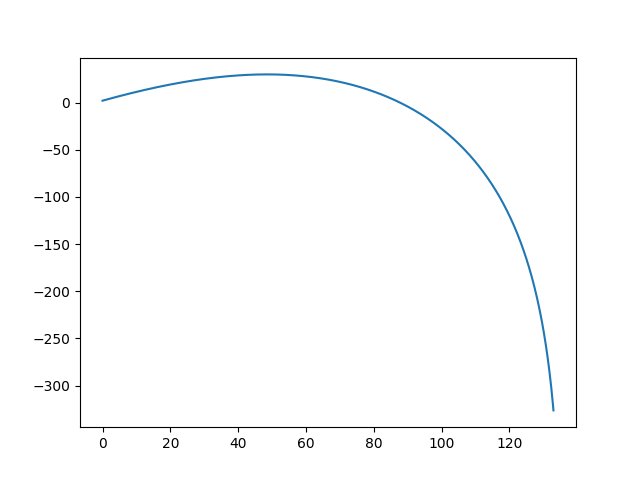

In [95]:
plt.plot(x,y)